<a href="https://colab.research.google.com/github/peterjsadowski/sklearn_examples/blob/master/sklearn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
# For more details see https://scikit-learn.org/stable/modules/linear_model.html

## Data:

In [2]:
# Load data.
data_url = 'https://raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/training_data.csv'
localfile = np.DataSource(destpath='./').open(data_url).name
print(localfile)
data = np.loadtxt(localfile, skiprows=1, delimiter=',')
Y = data[:, 0] 
X = data[:, 1:]

/Users/Spencer/Desktop/Machine_Comp/raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/training_data.csv


## Plot Features: 

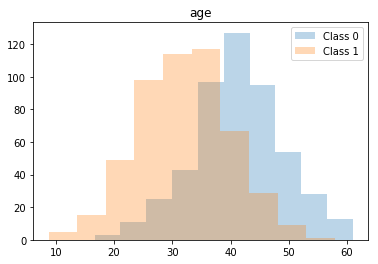

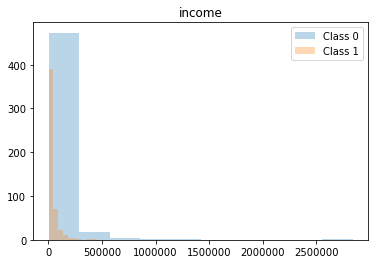

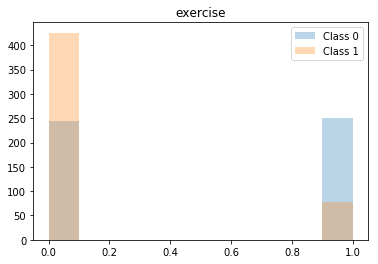

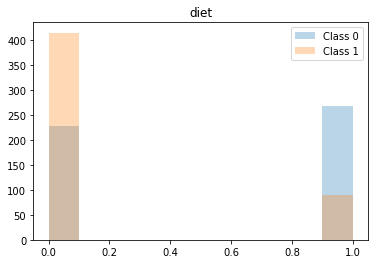

In [3]:
# Plot features. 
feature_names = ['age', 'income', 'exercise', 'diet']
for i in range(X.shape[1]):
    plt.figure(i)
    plt.hist(X[Y==0, i], label='Class 0', alpha=0.3)
    plt.hist(X[Y==1, i], label='Class 1', alpha=0.3)
    plt.title(feature_names[i])
    plt.legend()

## Classifier: 

In [4]:
# Preprocess data.
X[:, 0] /= 100. 
X[:, 1] /= 100000.

# Divide data into train and validation set.
N_train, N_valid = 900, 100
X_train, X_valid = X[0:N_train, :], X[N_train:, :]
y_train, y_valid = Y[0:N_train], Y[N_train:]

# Classifier Model:

############################################################################################################################

## SGDClassifier:

In [5]:
# Define a classifier model.
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)

# Fit/train/learn.
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=1e-06, verbose=0, warm_start=False)

In [6]:
# Compute accuracy on training data.
accuracy_train = clf.score(X_train, y_train)
print(f'Training accuracy: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted = clf.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy: {accuracy_valid:0.2}')
print('Validation predictions: ', y_predicted)

print('Coefficients: ', clf.coef_, clf.intercept_)

Training accuracy: 0.76
Validation accuracy: 0.76
Validation predictions:  [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1.]
Coefficients:  [[-0.32143706 -0.57644097 -0.89611134 -0.81747879]] [1.2]


############################################################################################################################


## RidgeClassifier:

In [7]:
# Define a classifier model. (Lots of options to choose from.)
clf = linear_model.RidgeClassifier(alpha=0.1)

# Fit/train/learn.
clf.fit(X_train, y_train)

RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [8]:
# Compute accuracy on training data.
accuracy_train = clf.score(X_train, y_train)
print(f'Training accuracy: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted = clf.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy: {accuracy_valid:0.2}')
print('Validation predictions: ', y_predicted)

print('Coefficients: ', clf.coef_, clf.intercept_)

Training accuracy: 0.82
Validation accuracy: 0.81
Validation predictions:  [1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1.]
Coefficients:  [[-4.54000346 -0.10879314 -0.57767725 -0.53714035]] [2.13350899]


############################################################################################################################


## KNeighborsClassifier:

In [9]:
# Define a classifier model. (Lots of options to choose from.)
clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Fit/train/learn.
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
# Compute accuracy on training data.
accuracy_train = clf.score(X_train, y_train)
print(f'Training accuracy: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted = clf.predict(X_valid)
accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
print(f'Validation accuracy: {accuracy_valid:0.2}')
print('Validation predictions: ', y_predicted)

Training accuracy: 1.0
Validation accuracy: 0.81
Validation predictions:  [1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1.]


############################################################################################################################


## Cross-Validation

In [11]:
### Example of Cross-Validation
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
cv_scores = cross_val_score(clf, X, Y, cv=5)
print('Cross-validation accuracies: ', cv_scores)
print('Mean CV accuracy: %0.2f' % np.mean(cv_scores))

Cross-validation accuracies:  [0.75621891 0.795      0.8        0.785      0.72361809]
Mean CV accuracy: 0.77


############################################################################################################################

# Problem One: 
#### Normalizing Data


In [12]:
from sklearn.preprocessing import StandardScaler
#sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaler = StandardScaler()
scaler.fit(data)
StandardScaler(copy=True, with_mean=True, with_std=True)
normalized_data = scaler.transform(data)
print(normalized_data.std()) # to check if normalized correctly. Should have a std deviation very close to one.
print(normalized_data.mean()) # should be very close to zero

0.9999999999999967
-4.661160346586258e-16


In [14]:
normalized_data

array([[ 0.99203175, -0.07135032, -0.3949963 , -0.70022351,  1.34205829],
       [-1.00803226,  0.2587429 , -0.16284127,  1.42811543,  1.34205829],
       [ 0.99203175, -0.9333843 , -0.26344178, -0.70022351, -0.74512412],
       ...,
       [ 0.99203175,  1.20218501, -0.4569043 , -0.70022351, -0.74512412],
       [-1.00803226, -1.29470256,  0.45623879, -0.70022351,  1.34205829],
       [ 0.99203175, -2.36750553, -0.4182118 ,  1.42811543, -0.74512412]])

In [15]:
normalized_data_y = normalized_data[:, 0].astype(int)
normalized_data_x = normalized_data[:, 1:]

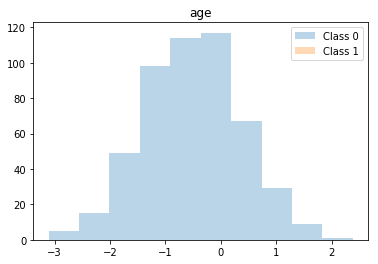

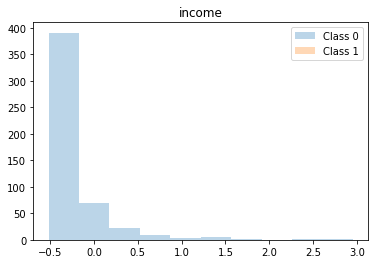

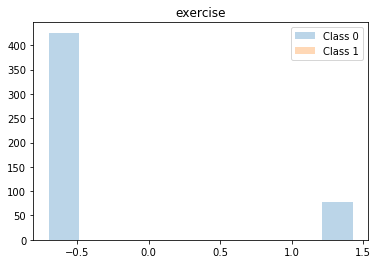

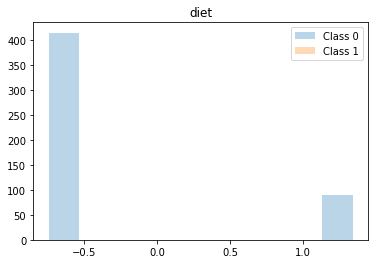

In [16]:
feature_names = ['age', 'income', 'exercise', 'diet']
for i in range(normalized_data_x.shape[1]):
    plt.figure(i)
    plt.hist(normalized_data_x[normalized_data_y==0, i], label='Class 0', alpha=0.3)
    plt.hist(normalized_data_x[normalized_data_y==1, i], label='Class 1', alpha=0.3)
    plt.title(feature_names[i])
    plt.legend()

## Comparing:

In [17]:
# Divide data into train and validation set.
N_train_norm, N_valid_norm = 900, 100
X_train_norm, X_valid_norm = normalized_data_x[0:N_train_norm, :], normalized_data_x[N_train_norm:, :]
y_train_norm, y_valid_norm = normalized_data_y[0:N_train_norm], normalized_data_y[N_train_norm:]

#### SGDClassifier

In [18]:
# Define a classifier model.
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)

# Fit/train/learn.
clf.fit(X_train_norm, y_train_norm)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=1e-06, verbose=0, warm_start=False)

In [19]:
# Compute accuracy on training data.
accuracy_train = clf.score(X_train_norm, y_train_norm)
print(f'Training accuracy: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted_norm = clf.predict(X_valid_norm)
accuracy_valid_norm = np.sum(y_predicted_norm == y_valid_norm) / len(y_predicted_norm)
print(f'Validation accuracy: {accuracy_valid_norm:0.2}')
print('Validation predictions: ', y_predicted_norm)

print('Coefficients: ', clf.coef_, clf.intercept_)

Training accuracy: 0.84
Validation accuracy: 0.82
Validation predictions:  [ 0 -1  0  0 -1  0 -1  0  0  0  0 -1  0 -1 -1  0  0 -1  0 -1  0 -1  0 -1
 -1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1  0 -1 -1 -1  0  0  0 -1  0
  0  0  0  0  0  0  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0  0  0  0 -1  0  0
 -1  0 -1  0 -1 -1  0  0 -1  0  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
  0  0  0  0]
Coefficients:  [[-0.66103443 -0.5425054  -0.5972827  -0.48752287]] [-0.01]


#### RidgeClassifier

In [20]:
# Define a classifier model. (Lots of options to choose from.)
clf = linear_model.RidgeClassifier(alpha=0.1)

# Fit/train/learn.
clf.fit(X_train_norm, y_train_norm)

RidgeClassifier(alpha=0.1, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [21]:
# Compute accuracy on training data.
accuracy_train = clf.score(X_train_norm, y_train_norm)
print(f'Training accuracy: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted_norm = clf.predict(X_valid_norm)
accuracy_valid = np.sum(y_predicted_norm == y_valid_norm) / len(y_predicted_norm)
print(f'Validation accuracy: {accuracy_valid:0.2}')
print('Validation predictions: ', y_predicted_norm)

print('Coefficients: ', clf.coef_, clf.intercept_)

Training accuracy: 0.82
Validation accuracy: 0.81
Validation predictions:  [ 0 -1  0  0 -1  0 -1  0  0  0  0 -1  0 -1 -1  0  0 -1  0 -1  0 -1  0 -1
 -1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1  0 -1 -1 -1  0  0  0 -1  0
  0  0  0  0  0  0  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0  0  0  0 -1  0  0
 -1  0 -1  0 -1 -1  0  0 -1  0  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1  0  0]
Coefficients:  [[-0.41307088 -0.14011914 -0.27072729 -0.2565562 ]] [0.0155297]


#### KNeighborsClassifier

In [22]:
# Define a classifier model. (Lots of options to choose from.)
clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Fit/train/learn.
clf.fit(X_train_norm, y_train_norm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
# Compute accuracy on training data.
accuracy_train = clf.score(X_train_norm, y_train_norm)
print(f'Training accuracy: {accuracy_train:0.2}')

# Compute accuracy on validation data.
y_predicted_norm = clf.predict(X_valid_norm)
accuracy_valid = np.sum(y_predicted_norm == y_valid_norm) / len(y_predicted_norm)
print(f'Validation accuracy: {accuracy_valid:0.2}')
print('Validation predictions: ', y_predicted_norm)

Training accuracy: 1.0
Validation accuracy: 0.74
Validation predictions:  [ 0 -1  0  0 -1 -1 -1  0  0  0  0 -1  0 -1 -1  0  0 -1  0 -1 -1  0  0 -1
  0 -1  0  0 -1 -1  0 -1  0 -1 -1  0  0 -1  0 -1  0  0 -1  0  0  0 -1  0
  0 -1  0  0 -1  0  0  0 -1 -1  0 -1  0 -1  0 -1  0  0  0  0  0  0 -1  0
 -1  0 -1  0 -1 -1 -1  0 -1  0 -1 -1  0 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1
  0  0 -1  0]


# Grid Search Cross Validation:

GridSearchCV helps find the best possible properties of a classifier. It runs and attempts all given parameters and feeds you the best result. 

In [37]:
grid = {
    'alpha': np.logspace(-4, 3, 10), #[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], # logistic regression,
    'penalty': ['l2', 'l1', 'elasticnet','none'],
    'n_jobs': [-1],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0':[0.01]
}

clf = sklearn.model_selection.GridSearchCV(linear_model.SGDClassifier(), grid, cv=5)
                       

clf.fit(X_train_norm, y_train_norm)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print(f"Score : {clf.best_score_}")

print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'alpha': 0.1291549665014884, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'squared_hinge', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'none'}
Score : 0.8433333333333334

Grid scores on development set:

0.827 (+/-0.059) for {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l2'}
0.829 (+/-0.056) for {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l1'}
0.830 (+/-0.050) for {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'elasticnet'}
0.829 (+/-0.059) for {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'none'}
0.836 (+/-0.066) for {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l